In [2]:
import pyspark as ps
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime

In [3]:
spark = (ps.sql.SparkSession
         .builder
         .master('local[4]')
         .appName('lecture')
         .getOrCreate()
        )
sc = spark.sparkContext

In [4]:
matches = pd.read_csv('soccer-spi/spi_matches.csv')

In [5]:
matches

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32335,2020-05-24,1869,Spanish Primera Division,Alavés,Barcelona,65.51,88.84,0.1774,0.6191,0.2034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32336,2020-05-24,1871,Spanish Segunda Division,Racing Santander,Rayo Vallecano,28.89,43.40,0.3065,0.4142,0.2793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32337,2020-05-24,1869,Spanish Primera Division,Granada,Athletic Bilbao,67.24,73.89,0.3937,0.2927,0.3136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32338,2020-05-24,1869,Spanish Primera Division,Levante,Getafe,63.81,78.47,0.3424,0.3809,0.2767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
pl_matches = matches[matches['league_id']==2411]

In [7]:
pl_matches

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
5,2016-08-13,2411,Barclays Premier League,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,0.2927,...,33.9,32.5,1.0,1.0,1.40,0.55,1.13,1.06,1.05,1.05
6,2016-08-13,2411,Barclays Premier League,Burnley,Swansea City,58.98,59.74,0.4482,0.2663,0.2854,...,36.5,29.1,0.0,1.0,1.24,1.84,1.71,1.56,0.00,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32242,2020-05-17,2411,Barclays Premier League,Arsenal,Watford,76.40,70.44,0.5322,0.2255,0.2423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32243,2020-05-17,2411,Barclays Premier League,Burnley,Brighton and Hove Albion,68.81,71.24,0.4172,0.3078,0.2751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32244,2020-05-17,2411,Barclays Premier League,Chelsea,Wolverhampton,85.02,78.08,0.5641,0.2001,0.2358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32245,2020-05-17,2411,Barclays Premier League,Manchester City,Norwich City,93.85,60.11,0.9087,0.0218,0.0695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
pl_wins = pl_matches.loc[pl_matches.score1 > pl_matches.score2]
pl_ties = pl_matches.loc[pl_matches.score1 == pl_matches.score2]

In [9]:
pl_matches.loc[pl_matches['date'] == '2019-05-12']

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
21728,2019-05-12,2411,Barclays Premier League,Tottenham Hotspur,Everton,83.51,76.69,0.4852,0.2388,0.2760,...,0.8,0.0,2.0,2.0,0.86,2.43,0.84,1.34,2.10,2.10
21730,2019-05-12,2411,Barclays Premier League,Fulham,Newcastle,58.81,67.54,0.3598,0.3555,0.2847,...,0.0,0.0,0.0,4.0,0.76,2.06,2.03,1.19,0.00,3.69
21731,2019-05-12,2411,Barclays Premier League,Southampton,Huddersfield Town,66.77,50.81,0.4893,0.2390,0.2718,...,0.0,0.0,1.0,1.0,0.96,1.02,1.38,0.48,1.05,1.05
21732,2019-05-12,2411,Barclays Premier League,Manchester United,Cardiff City,76.84,58.35,0.5125,0.2351,0.2524,...,0.0,0.0,0.0,2.0,1.95,1.66,3.17,0.63,0.00,2.10
21735,2019-05-12,2411,Barclays Premier League,Leicester City,Chelsea,74.79,84.48,0.3403,0.3888,0.2709,...,0.0,0.0,0.0,0.0,0.42,1.44,0.89,1.71,0.00,0.00
21737,2019-05-12,2411,Barclays Premier League,Crystal Palace,AFC Bournemouth,70.33,67.16,0.4222,0.3220,0.2559,...,0.0,0.0,5.0,3.0,2.69,2.17,1.29,1.77,4.99,3.15
21743,2019-05-12,2411,Barclays Premier League,Liverpool,Wolverhampton,93.31,72.23,0.8453,0.0351,0.1196,...,58.9,0.0,2.0,0.0,2.00,1.09,1.18,1.12,1.82,0.00
21744,2019-05-12,2411,Barclays Premier League,Burnley,Arsenal,66.06,77.72,0.3295,0.4169,0.2536,...,0.0,0.5,1.0,3.0,1.71,2.86,2.23,2.25,1.05,2.63
21745,2019-05-12,2411,Barclays Premier League,Watford,West Ham United,67.32,65.35,0.4209,0.3211,0.2580,...,0.0,0.0,1.0,4.0,2.07,2.86,2.24,1.91,1.05,3.60
21746,2019-05-12,2411,Barclays Premier League,Brighton and Hove Albion,Manchester City,58.23,94.24,0.0346,0.8527,0.1127,...,0.0,100.0,1.0,4.0,0.67,2.11,0.33,3.74,1.05,4.16


In [10]:
pl_matches.loc[pl_matches['date'] == '2018-08-10']

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
11686,2018-08-10,2411,Barclays Premier League,Manchester United,Leicester City,82.66,69.64,0.64,0.1385,0.2215,...,60.3,21.3,2.0,1.0,1.5,1.72,0.71,1.8,1.78,1.05


In [11]:
all_2018 = matches.iloc[11686:21747]

In [12]:
pl_2018 = all_2018.loc[all_2018['league_id'] == 2411]

In [13]:
pl_2018

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
11686,2018-08-10,2411,Barclays Premier League,Manchester United,Leicester City,82.66,69.64,0.6400,0.1385,0.2215,...,60.3,21.3,2.0,1.0,1.50,1.72,0.71,1.80,1.78,1.05
11705,2018-08-11,2411,Barclays Premier League,Newcastle,Tottenham Hotspur,67.21,85.75,0.2010,0.5565,0.2425,...,23.8,57.8,1.0,2.0,1.08,2.15,1.60,1.50,1.05,2.10
11723,2018-08-11,2411,Barclays Premier League,AFC Bournemouth,Cardiff City,62.75,59.47,0.4886,0.2451,0.2664,...,36.3,40.0,2.0,0.0,2.20,0.96,2.28,1.16,1.58,0.00
11730,2018-08-11,2411,Barclays Premier League,Huddersfield Town,Chelsea,60.20,84.39,0.1644,0.5945,0.2411,...,36.1,58.8,0.0,3.0,0.45,2.16,0.94,1.35,0.00,2.90
11736,2018-08-11,2411,Barclays Premier League,Fulham,Crystal Palace,64.41,70.20,0.3881,0.3341,0.2778,...,31.9,18.1,0.0,2.0,0.60,0.89,1.38,1.22,0.00,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,2019-05-12,2411,Barclays Premier League,Crystal Palace,AFC Bournemouth,70.33,67.16,0.4222,0.3220,0.2559,...,0.0,0.0,5.0,3.0,2.69,2.17,1.29,1.77,4.99,3.15
21743,2019-05-12,2411,Barclays Premier League,Liverpool,Wolverhampton,93.31,72.23,0.8453,0.0351,0.1196,...,58.9,0.0,2.0,0.0,2.00,1.09,1.18,1.12,1.82,0.00
21744,2019-05-12,2411,Barclays Premier League,Burnley,Arsenal,66.06,77.72,0.3295,0.4169,0.2536,...,0.0,0.5,1.0,3.0,1.71,2.86,2.23,2.25,1.05,2.63
21745,2019-05-12,2411,Barclays Premier League,Watford,West Ham United,67.32,65.35,0.4209,0.3211,0.2580,...,0.0,0.0,1.0,4.0,2.07,2.86,2.24,1.91,1.05,3.60


In [14]:
pl_matches.iloc[0: 380]

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
5,2016-08-13,2411,Barclays Premier League,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,0.2927,...,33.9,32.5,1.0,1.0,1.40,0.55,1.13,1.06,1.05,1.05
6,2016-08-13,2411,Barclays Premier League,Burnley,Swansea City,58.98,59.74,0.4482,0.2663,0.2854,...,36.5,29.1,0.0,1.0,1.24,1.84,1.71,1.56,0.00,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,2017-05-21,2411,Barclays Premier League,Manchester United,Crystal Palace,79.80,61.19,0.6816,0.1020,0.2164,...,0.0,0.0,2.0,0.0,0.96,0.34,0.98,1.09,2.10,0.00
2410,2017-05-21,2411,Barclays Premier League,Chelsea,Sunderland,85.90,45.14,0.8429,0.0371,0.1200,...,0.0,0.0,5.0,1.0,2.61,0.45,4.13,0.12,4.04,1.05
2411,2017-05-21,2411,Barclays Premier League,Hull City,Tottenham Hotspur,46.14,85.80,0.0620,0.7893,0.1486,...,0.0,0.0,1.0,7.0,1.02,3.99,0.70,3.10,1.05,6.52
2412,2017-05-21,2411,Barclays Premier League,Arsenal,Everton,80.08,71.02,0.5950,0.1824,0.2225,...,65.4,0.0,3.0,1.0,3.29,2.14,2.59,1.87,2.63,1.05


In [15]:
pl_matches.iloc[380:760]

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
3110,2017-08-11,2411,Barclays Premier League,Arsenal,Leicester City,78.18,61.77,0.6430,0.1563,0.2007,...,59.9,18.8,4.0,3.0,2.62,1.19,2.89,0.99,4.20,3.15
3117,2017-08-12,2411,Barclays Premier League,Watford,Liverpool,54.25,77.15,0.2193,0.5384,0.2423,...,31.7,57.7,3.0,3.0,1.99,2.36,0.71,1.67,3.15,3.15
3121,2017-08-12,2411,Barclays Premier League,Southampton,Swansea City,63.35,57.72,0.5044,0.2296,0.2660,...,18.9,25.5,0.0,0.0,2.50,0.29,2.95,0.41,0.00,0.00
3123,2017-08-12,2411,Barclays Premier League,Chelsea,Burnley,82.76,59.76,0.7184,0.1011,0.1805,...,49.1,21.0,2.0,3.0,1.63,0.46,1.75,1.17,2.10,2.52
3128,2017-08-12,2411,Barclays Premier League,Everton,Stoke City,67.06,60.80,0.5129,0.2283,0.2588,...,25.8,17.0,1.0,0.0,0.64,0.38,1.34,1.13,1.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10584,2018-05-13,2411,Barclays Premier League,Burnley,AFC Bournemouth,59.71,56.15,0.4800,0.2476,0.2724,...,0.0,0.0,1.0,2.0,1.42,1.58,1.55,1.17,1.05,2.10
10588,2018-05-13,2411,Barclays Premier League,Newcastle,Chelsea,58.98,80.83,0.2189,0.5251,0.2560,...,0.0,11.4,3.0,0.0,2.25,0.99,1.03,1.16,3.15,0.00
10589,2018-05-13,2411,Barclays Premier League,Southampton,Manchester City,60.42,90.05,0.1295,0.6750,0.1955,...,0.0,0.0,0.0,1.0,0.49,0.91,0.86,1.40,0.00,1.05
10592,2018-05-13,2411,Barclays Premier League,West Ham United,Everton,56.06,61.06,0.3934,0.3341,0.2725,...,0.0,0.0,3.0,1.0,1.17,1.75,2.02,1.06,2.85,1.05


In [16]:
pl_scores = pl_matches.drop(['league_id', 'proj_score2', 'proj_score1', 'league', 'spi1', 'spi2', 'prob1', 'prob2', 'probtie', 'importance1', 'importance2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2'], axis = 1)

In [17]:
pl_matches.loc[pl_matches['date'] == '2020-05-17']

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
32232,2020-05-17,2411,Barclays Premier League,Everton,AFC Bournemouth,78.48,65.91,0.5927,0.1702,0.2372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32233,2020-05-17,2411,Barclays Premier League,Leicester City,Manchester United,82.63,81.06,0.4763,0.2699,0.2538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32237,2020-05-17,2411,Barclays Premier League,West Ham United,Aston Villa,66.85,61.64,0.5084,0.2606,0.2309,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32240,2020-05-17,2411,Barclays Premier League,Crystal Palace,Tottenham Hotspur,69.75,81.90,0.2910,0.4531,0.2558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32241,2020-05-17,2411,Barclays Premier League,Southampton,Sheffield United,69.75,72.30,0.4336,0.2889,0.2775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32242,2020-05-17,2411,Barclays Premier League,Arsenal,Watford,76.40,70.44,0.5322,0.2255,0.2423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32243,2020-05-17,2411,Barclays Premier League,Burnley,Brighton and Hove Albion,68.81,71.24,0.4172,0.3078,0.2751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32244,2020-05-17,2411,Barclays Premier League,Chelsea,Wolverhampton,85.02,78.08,0.5641,0.2001,0.2358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32245,2020-05-17,2411,Barclays Premier League,Manchester City,Norwich City,93.85,60.11,0.9087,0.0218,0.0695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32246,2020-05-17,2411,Barclays Premier League,Newcastle,Liverpool,61.28,94.08,0.0887,0.7594,0.1519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
pl_matches

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
5,2016-08-13,2411,Barclays Premier League,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,0.2927,...,33.9,32.5,1.0,1.0,1.40,0.55,1.13,1.06,1.05,1.05
6,2016-08-13,2411,Barclays Premier League,Burnley,Swansea City,58.98,59.74,0.4482,0.2663,0.2854,...,36.5,29.1,0.0,1.0,1.24,1.84,1.71,1.56,0.00,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32242,2020-05-17,2411,Barclays Premier League,Arsenal,Watford,76.40,70.44,0.5322,0.2255,0.2423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32243,2020-05-17,2411,Barclays Premier League,Burnley,Brighton and Hove Albion,68.81,71.24,0.4172,0.3078,0.2751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32244,2020-05-17,2411,Barclays Premier League,Chelsea,Wolverhampton,85.02,78.08,0.5641,0.2001,0.2358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32245,2020-05-17,2411,Barclays Premier League,Manchester City,Norwich City,93.85,60.11,0.9087,0.0218,0.0695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
pl_matches =pl_matches.iloc[0:-380]

In [20]:
pl_matches

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
5,2016-08-13,2411,Barclays Premier League,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,0.2927,...,33.9,32.5,1.0,1.0,1.40,0.55,1.13,1.06,1.05,1.05
6,2016-08-13,2411,Barclays Premier League,Burnley,Swansea City,58.98,59.74,0.4482,0.2663,0.2854,...,36.5,29.1,0.0,1.0,1.24,1.84,1.71,1.56,0.00,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,2019-05-12,2411,Barclays Premier League,Crystal Palace,AFC Bournemouth,70.33,67.16,0.4222,0.3220,0.2559,...,0.0,0.0,5.0,3.0,2.69,2.17,1.29,1.77,4.99,3.15
21743,2019-05-12,2411,Barclays Premier League,Liverpool,Wolverhampton,93.31,72.23,0.8453,0.0351,0.1196,...,58.9,0.0,2.0,0.0,2.00,1.09,1.18,1.12,1.82,0.00
21744,2019-05-12,2411,Barclays Premier League,Burnley,Arsenal,66.06,77.72,0.3295,0.4169,0.2536,...,0.0,0.5,1.0,3.0,1.71,2.86,2.23,2.25,1.05,2.63
21745,2019-05-12,2411,Barclays Premier League,Watford,West Ham United,67.32,65.35,0.4209,0.3211,0.2580,...,0.0,0.0,1.0,4.0,2.07,2.86,2.24,1.91,1.05,3.60


In [21]:
pl_scores = pl_matches.drop(['league_id', 'proj_score1', 'proj_score2', 'league', 'spi1', 'spi2', 'prob1', 'prob2', 'probtie', 'importance1', 'importance2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2'], axis=1)

In [22]:
pl_scores

,date,team1,team2,score1,score2
2,2016-08-13,Hull City,Leicester City,2.0,1.0
3,2016-08-13,Crystal Palace,West Bromwich Albion,0.0,1.0
4,2016-08-13,Everton,Tottenham Hotspur,1.0,1.0
5,2016-08-13,Middlesbrough,Stoke City,1.0,1.0
6,2016-08-13,Burnley,Swansea City,0.0,1.0
...,...,...,...,...,...
21737,2019-05-12,Crystal Palace,AFC Bournemouth,5.0,3.0
21743,2019-05-12,Liverpool,Wolverhampton,2.0,0.0
21744,2019-05-12,Burnley,Arsenal,1.0,3.0
21745,2019-05-12,Watford,West Ham United,1.0,4.0


In [23]:
pl_scores_2016 = pl_scores.iloc[0:380]
pl_scores_2016

,date,team1,team2,score1,score2
2,2016-08-13,Hull City,Leicester City,2.0,1.0
3,2016-08-13,Crystal Palace,West Bromwich Albion,0.0,1.0
4,2016-08-13,Everton,Tottenham Hotspur,1.0,1.0
5,2016-08-13,Middlesbrough,Stoke City,1.0,1.0
6,2016-08-13,Burnley,Swansea City,0.0,1.0
...,...,...,...,...,...
2409,2017-05-21,Manchester United,Crystal Palace,2.0,0.0
2410,2017-05-21,Chelsea,Sunderland,5.0,1.0
2411,2017-05-21,Hull City,Tottenham Hotspur,1.0,7.0
2412,2017-05-21,Arsenal,Everton,3.0,1.0


In [24]:
chelsea_2016 = pl_scores_2016[(pl_scores_2016['team1']=='Chelsea') | (pl_scores_2016['team2']=='Chelsea')]

In [25]:
chelsea_2016

,date,team1,team2,score1,score2
19,2016-08-15,Chelsea,West Ham United,2.0,1.0
27,2016-08-20,Watford,Chelsea,1.0,2.0
74,2016-08-27,Chelsea,Burnley,3.0,0.0
148,2016-09-11,Swansea City,Chelsea,2.0,2.0
177,2016-09-16,Chelsea,Liverpool,1.0,2.0
280,2016-09-24,Arsenal,Chelsea,3.0,0.0
340,2016-10-01,Hull City,Chelsea,0.0,2.0
380,2016-10-15,Chelsea,Leicester City,3.0,0.0
481,2016-10-23,Chelsea,Manchester United,4.0,0.0
537,2016-10-30,Southampton,Chelsea,0.0,2.0


In [26]:
chelsea_2016['score3'] = chelsea_2016['score1'] - chelsea_2016['score2']

/Users/kevinpark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
chelsea_2016

,date,team1,team2,score1,score2,score3
19,2016-08-15,Chelsea,West Ham United,2.0,1.0,1.0
27,2016-08-20,Watford,Chelsea,1.0,2.0,-1.0
74,2016-08-27,Chelsea,Burnley,3.0,0.0,3.0
148,2016-09-11,Swansea City,Chelsea,2.0,2.0,0.0
177,2016-09-16,Chelsea,Liverpool,1.0,2.0,-1.0
280,2016-09-24,Arsenal,Chelsea,3.0,0.0,3.0
340,2016-10-01,Hull City,Chelsea,0.0,2.0,-2.0
380,2016-10-15,Chelsea,Leicester City,3.0,0.0,3.0
481,2016-10-23,Chelsea,Manchester United,4.0,0.0,4.0
537,2016-10-30,Southampton,Chelsea,0.0,2.0,-2.0


In [28]:
pl_matches

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
5,2016-08-13,2411,Barclays Premier League,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,0.2927,...,33.9,32.5,1.0,1.0,1.40,0.55,1.13,1.06,1.05,1.05
6,2016-08-13,2411,Barclays Premier League,Burnley,Swansea City,58.98,59.74,0.4482,0.2663,0.2854,...,36.5,29.1,0.0,1.0,1.24,1.84,1.71,1.56,0.00,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,2019-05-12,2411,Barclays Premier League,Crystal Palace,AFC Bournemouth,70.33,67.16,0.4222,0.3220,0.2559,...,0.0,0.0,5.0,3.0,2.69,2.17,1.29,1.77,4.99,3.15
21743,2019-05-12,2411,Barclays Premier League,Liverpool,Wolverhampton,93.31,72.23,0.8453,0.0351,0.1196,...,58.9,0.0,2.0,0.0,2.00,1.09,1.18,1.12,1.82,0.00
21744,2019-05-12,2411,Barclays Premier League,Burnley,Arsenal,66.06,77.72,0.3295,0.4169,0.2536,...,0.0,0.5,1.0,3.0,1.71,2.86,2.23,2.25,1.05,2.63
21745,2019-05-12,2411,Barclays Premier League,Watford,West Ham United,67.32,65.35,0.4209,0.3211,0.2580,...,0.0,0.0,1.0,4.0,2.07,2.86,2.24,1.91,1.05,3.60


In [29]:
projected = pl_matches.drop(['league_id', 'league', 'spi1', 'spi2', 'importance1', 'importance2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2'], axis=1)

In [30]:
projected['score3'] = projected['score1'] - projected['score2']

In [31]:
projected_home = projected.copy().drop(['team2', 'prob2', 'proj_score1', 'proj_score2', 'xg1', 'score1','score2', 'xg2'], axis=1)
projected_home

,date,team1,prob1,probtie,score3
2,2016-08-13,Hull City,0.3459,0.2921,1.0
3,2016-08-13,Crystal Palace,0.4214,0.2847,-1.0
4,2016-08-13,Everton,0.3910,0.2689,0.0
5,2016-08-13,Middlesbrough,0.4380,0.2927,0.0
6,2016-08-13,Burnley,0.4482,0.2854,-1.0
...,...,...,...,...,...
21737,2019-05-12,Crystal Palace,0.4222,0.2559,2.0
21743,2019-05-12,Liverpool,0.8453,0.1196,2.0
21744,2019-05-12,Burnley,0.3295,0.2536,-2.0
21745,2019-05-12,Watford,0.4209,0.2580,-3.0


In [32]:
chelsea = projected[(projected['team1']=='Chelsea') | (projected['team2']=='Chelsea')]

In [33]:
chelsea2016 = chelsea[0:38]
chelsea2016home = chelsea2016[chelsea2016['team1'] == 'Chelsea']
chelsea2016home

,date,team1,team2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,score3
19,2016-08-15,Chelsea,West Ham United,0.6908,0.1177,0.1915,2.23,0.91,2.0,1.0,1.55,0.55,1.0
74,2016-08-27,Chelsea,Burnley,0.7139,0.0914,0.1947,2.04,0.63,3.0,0.0,2.73,0.26,3.0
177,2016-09-16,Chelsea,Liverpool,0.5080,0.2532,0.2388,1.88,1.34,1.0,2.0,1.32,1.47,-1.0
380,2016-10-15,Chelsea,Leicester City,0.6441,0.1367,0.2192,1.93,0.86,3.0,0.0,2.65,0.30,3.0
481,2016-10-23,Chelsea,Manchester United,0.4996,0.2397,0.2607,1.58,1.16,4.0,0.0,2.20,1.20,4.0
581,2016-11-05,Chelsea,Everton,0.6702,0.1221,0.2077,2.00,0.84,5.0,0.0,1.74,0.02,5.0
696,2016-11-26,Chelsea,Tottenham Hotspur,0.6450,0.1322,0.2228,1.84,0.84,2.0,1.0,1.12,0.48,1.0
829,2016-12-11,Chelsea,West Bromwich Albion,0.7776,0.0659,0.1565,2.43,0.51,1.0,0.0,0.64,0.24,1.0
941,2016-12-26,Chelsea,AFC Bournemouth,0.7867,0.0625,0.1508,2.54,0.53,3.0,0.0,1.60,0.66,3.0
949,2016-12-31,Chelsea,Stoke City,0.7734,0.0593,0.1674,2.25,0.39,4.0,2.0,1.86,0.94,2.0


In [34]:
chelsea2016away=chelsea2016[chelsea2016['team2'] == 'Chelsea']
chelsea2016away

,date,team1,team2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,score3
27,2016-08-20,Watford,Chelsea,0.1955,0.5783,0.2262,1.20,1.98,1.0,2.0,0.76,1.87,-1.0
148,2016-09-11,Swansea City,Chelsea,0.1710,0.6033,0.2257,1.07,1.89,2.0,2.0,1.33,2.36,0.0
280,2016-09-24,Arsenal,Chelsea,0.4983,0.2563,0.2453,1.79,1.30,3.0,0.0,1.68,0.68,3.0
340,2016-10-01,Hull City,Chelsea,0.1539,0.6221,0.2240,0.95,1.87,0.0,2.0,0.28,2.10,-2.0
537,2016-10-30,Southampton,Chelsea,0.2835,0.4507,0.2658,1.25,1.52,0.0,2.0,0.64,1.12,-2.0
653,2016-11-20,Middlesbrough,Chelsea,0.1203,0.6708,0.2090,0.84,1.86,0.0,1.0,0.65,1.73,-1.0
741,2016-12-03,Manchester City,Chelsea,0.4914,0.2601,0.2485,1.73,1.28,1.0,3.0,2.72,1.39,-2.0
853,2016-12-14,Sunderland,Chelsea,0.0736,0.7687,0.1577,0.83,2.26,0.0,1.0,0.55,1.08,-1.0
864,2016-12-17,Crystal Palace,Chelsea,0.1037,0.7218,0.1745,1.04,2.28,0.0,1.0,0.42,0.80,-1.0
964,2017-01-04,Tottenham Hotspur,Chelsea,0.3420,0.3830,0.2750,1.34,1.37,2.0,0.0,1.00,1.22,2.0


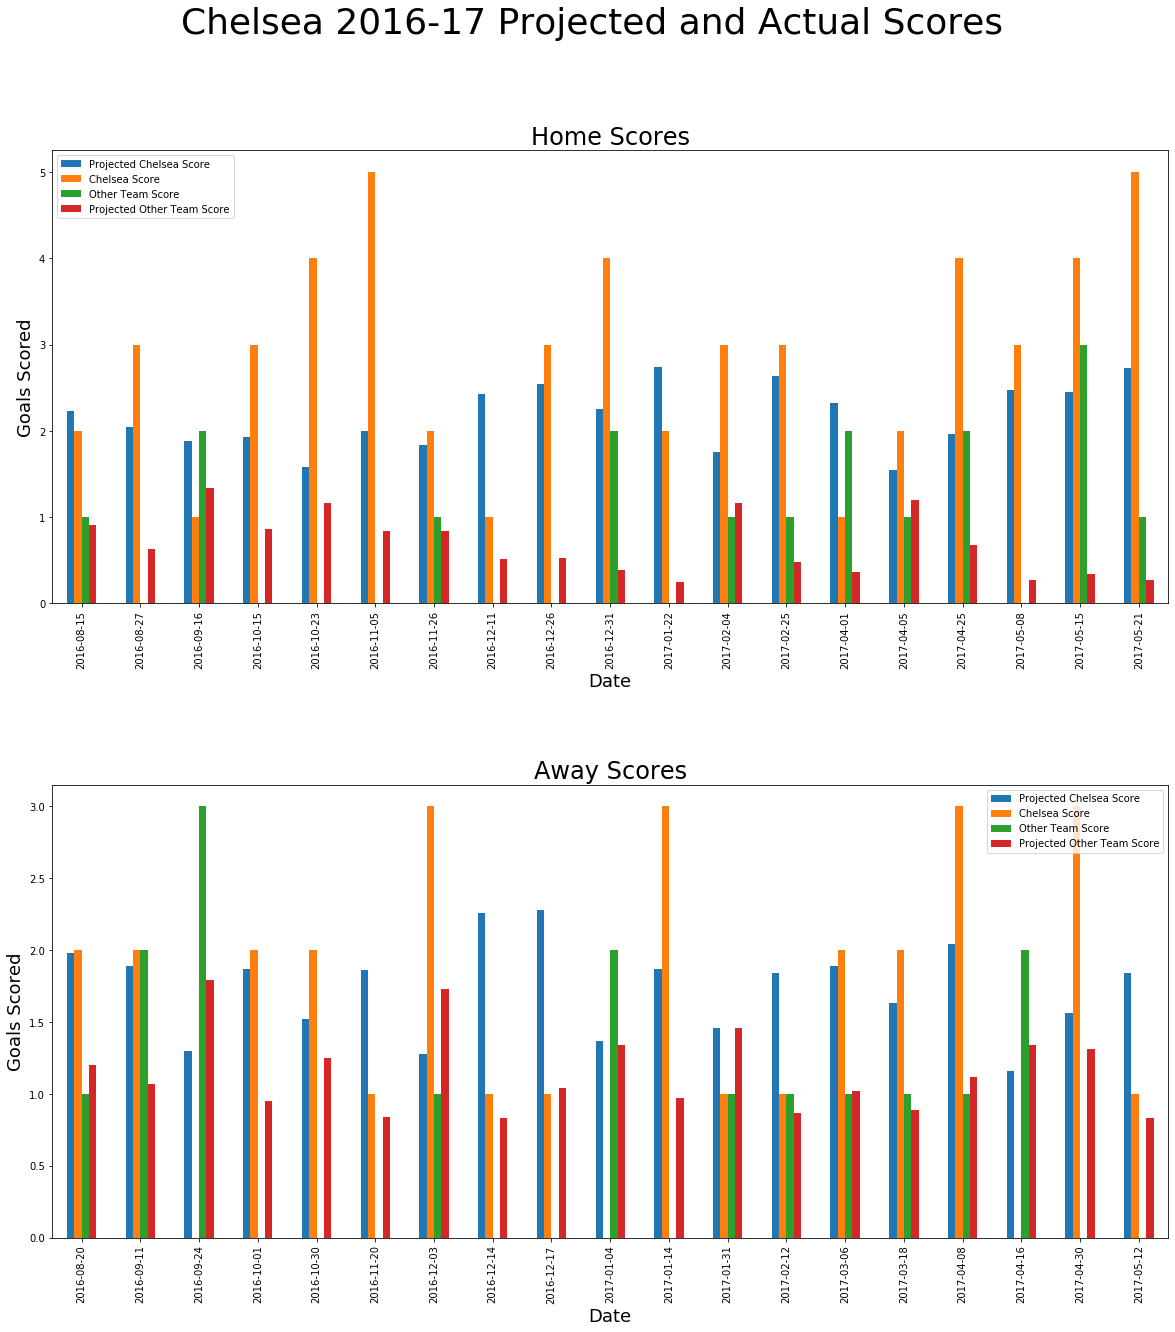

In [35]:
fig, ax = plt.subplots(2, figsize=[20,20])

fig.suptitle('Chelsea 2016-17 Projected and Actual Scores', fontsize =36)

chelsea2016home.plot(ax = ax[0], x = 'date', y=['proj_score1','score1', 'score2', 'proj_score2'], kind='bar')
ax[0].set_title('Home Scores', fontsize = 24)
ax[0].set_xlabel('Date', fontsize = 18)
ax[0].set_ylabel('Goals Scored', fontsize =18)
fig.subplots_adjust(hspace=.4)

chelsea2016away.plot(ax = ax[1], x = 'date', y=['proj_score2', 'score2', 'score1', 'proj_score1'], kind='bar')
ax[1].set_title('Away Scores', fontsize = 24)
fig.subplots_adjust(hspace=.4)


ax[1].set_xlabel('Date', fontsize = 18)
ax[1].set_ylabel('Goals Scored', fontsize = 18)

current_handles, current_labels = plt.gca().get_legend_handles_labels()
ax[0].legend(current_handles, ["Projected Chelsea Score", "Chelsea Score", "Other Team Score", "Projected Other Team Score"])
ax[1].legend(current_handles, ["Projected Chelsea Score", "Chelsea Score", "Other Team Score", "Projected Other Team Score"])


In [36]:
pl_matches

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
5,2016-08-13,2411,Barclays Premier League,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,0.2927,...,33.9,32.5,1.0,1.0,1.40,0.55,1.13,1.06,1.05,1.05
6,2016-08-13,2411,Barclays Premier League,Burnley,Swansea City,58.98,59.74,0.4482,0.2663,0.2854,...,36.5,29.1,0.0,1.0,1.24,1.84,1.71,1.56,0.00,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,2019-05-12,2411,Barclays Premier League,Crystal Palace,AFC Bournemouth,70.33,67.16,0.4222,0.3220,0.2559,...,0.0,0.0,5.0,3.0,2.69,2.17,1.29,1.77,4.99,3.15
21743,2019-05-12,2411,Barclays Premier League,Liverpool,Wolverhampton,93.31,72.23,0.8453,0.0351,0.1196,...,58.9,0.0,2.0,0.0,2.00,1.09,1.18,1.12,1.82,0.00
21744,2019-05-12,2411,Barclays Premier League,Burnley,Arsenal,66.06,77.72,0.3295,0.4169,0.2536,...,0.0,0.5,1.0,3.0,1.71,2.86,2.23,2.25,1.05,2.63
21745,2019-05-12,2411,Barclays Premier League,Watford,West Ham United,67.32,65.35,0.4209,0.3211,0.2580,...,0.0,0.0,1.0,4.0,2.07,2.86,2.24,1.91,1.05,3.60


In [37]:
pl_2018=pl_matches[-380:]

In [38]:
projected_18 = pl_2018.drop(['league_id', 'league', 'spi1', 'spi2', 'importance1', 'importance2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2'], axis=1)

In [39]:
mancity_2018 = projected_18[(projected_18['team1']=='Manchester City') | (projected_18['team2']=='Manchester City')]

In [40]:
mancity_2018

,date,team1,team2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2
11845,2018-08-12,Arsenal,Manchester City,0.2765,0.4894,0.2341,1.47,2.00,0.0,2.0,0.50,1.82
12084,2018-08-19,Manchester City,Huddersfield Town,0.8927,0.0146,0.0927,2.76,0.20,6.0,1.0,4.46,0.74
12283,2018-08-25,Wolverhampton,Manchester City,0.0943,0.7304,0.1753,0.74,2.41,1.0,1.0,1.19,1.88
12682,2018-09-01,Manchester City,Newcastle,0.8643,0.0264,0.1093,2.72,0.32,2.0,1.0,2.55,0.61
12989,2018-09-15,Manchester City,Fulham,0.8748,0.0282,0.0970,2.99,0.41,3.0,0.0,4.62,0.41
13379,2018-09-22,Cardiff City,Manchester City,0.0886,0.7432,0.1682,0.74,2.48,0.0,5.0,0.14,3.32
13733,2018-09-29,Manchester City,Brighton and Hove Albion,0.8899,0.0212,0.0889,2.99,0.32,2.0,0.0,3.06,0.33
14277,2018-10-07,Liverpool,Manchester City,0.3758,0.3658,0.2583,1.55,1.53,0.0,0.0,0.42,1.05
14461,2018-10-20,Manchester City,Burnley,0.9113,0.0132,0.0755,3.05,0.23,5.0,0.0,5.25,0.34
15032,2018-10-29,Tottenham Hotspur,Manchester City,0.2415,0.5145,0.2441,1.22,1.87,0.0,1.0,0.54,2.15


In [41]:
mancity18home = mancity_2018[mancity_2018['team1'] == 'Manchester City']
mancity18away = mancity_2018[mancity_2018['team2'] == 'Manchester City']

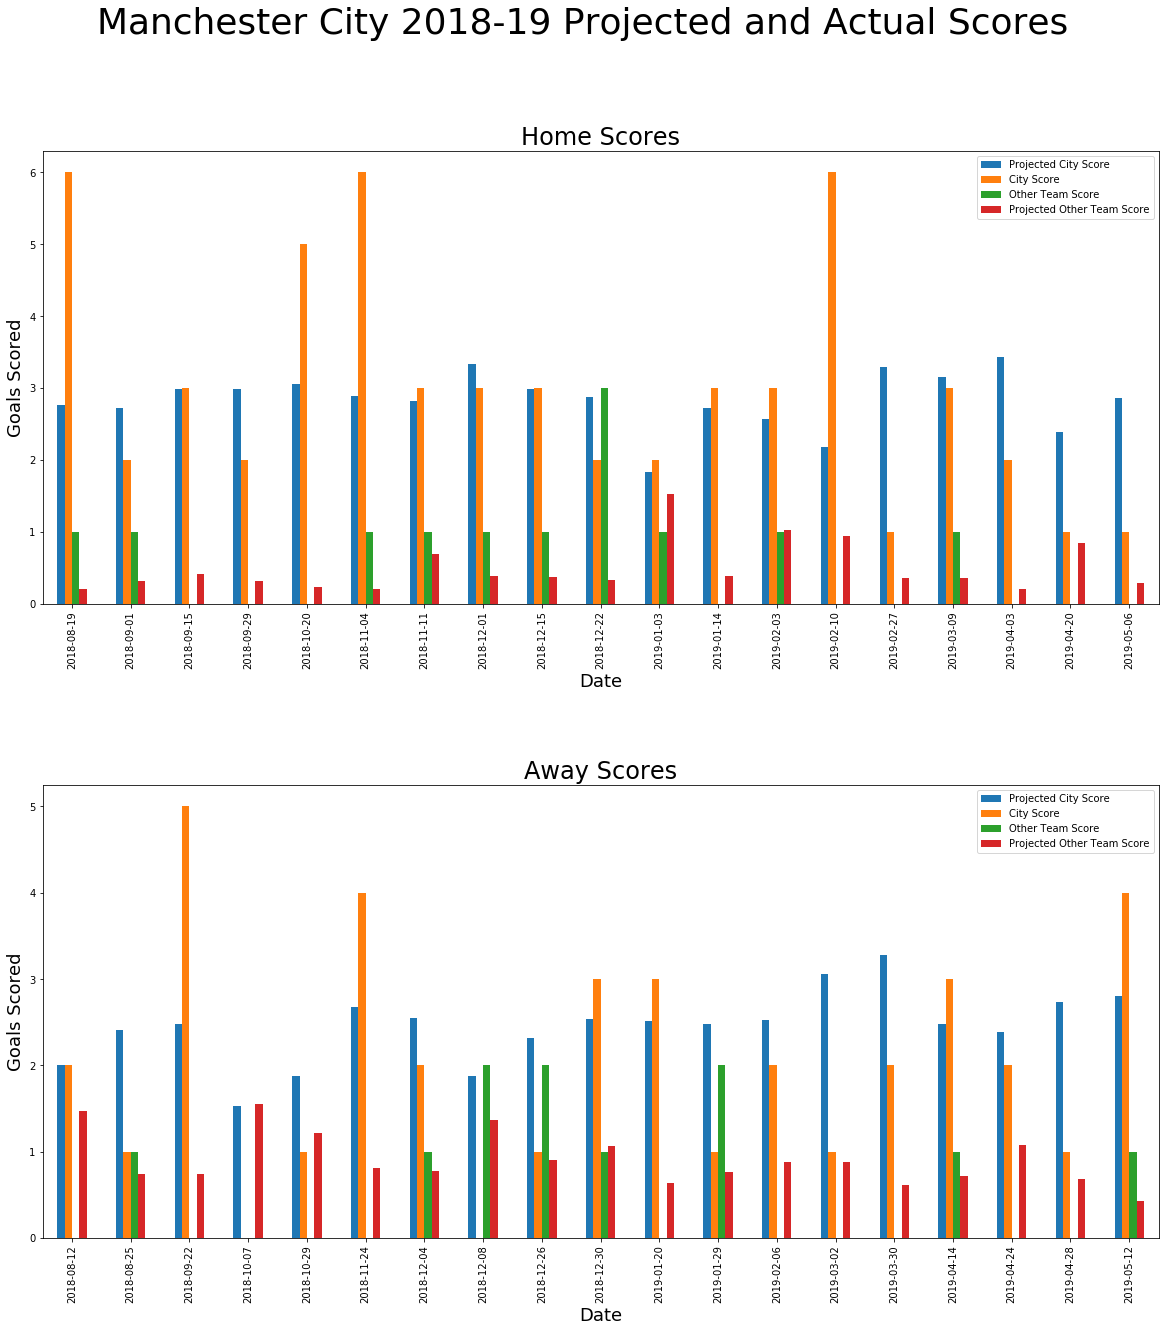

In [42]:
fig, ax = plt.subplots(2, figsize=[20,20])

fig.suptitle('Manchester City 2018-19 Projected and Actual Scores', fontsize =36)

mancity18home.plot(ax = ax[0], x = 'date', y=['proj_score1','score1', 'score2', 'proj_score2'], kind='bar')
ax[0].set_title('Home Scores', fontsize = 24)
ax[0].set_xlabel('Date', fontsize = 18)
ax[0].set_ylabel('Goals Scored', fontsize =18)
fig.subplots_adjust(hspace=.4)

mancity18away.plot(ax = ax[1], x = 'date', y=['proj_score2', 'score2', 'score1', 'proj_score1'], kind='bar')
ax[1].set_title('Away Scores', fontsize = 24)
fig.subplots_adjust(hspace=.4)


ax[1].set_xlabel('Date', fontsize = 18)
ax[1].set_ylabel('Goals Scored', fontsize = 18)

current_handles, current_labels = plt.gca().get_legend_handles_labels()
ax[0].legend(current_handles, ["Projected City Score", "City Score", "Other Team Score", "Projected Other Team Score"])
ax[1].legend(current_handles, ["Projected City Score", "City Score", "Other Team Score", "Projected Other Team Score"])


In [43]:
manutd_2018 = projected_18[(projected_18['team1']=='Manchester United') | (projected_18['team2']=='Manchester United')]

In [45]:
manutd18home = manutd_2018[manutd_2018['team1'] == 'Manchester United']
manutd18away = manutd_2018[manutd_2018['team2'] == 'Manchester United']

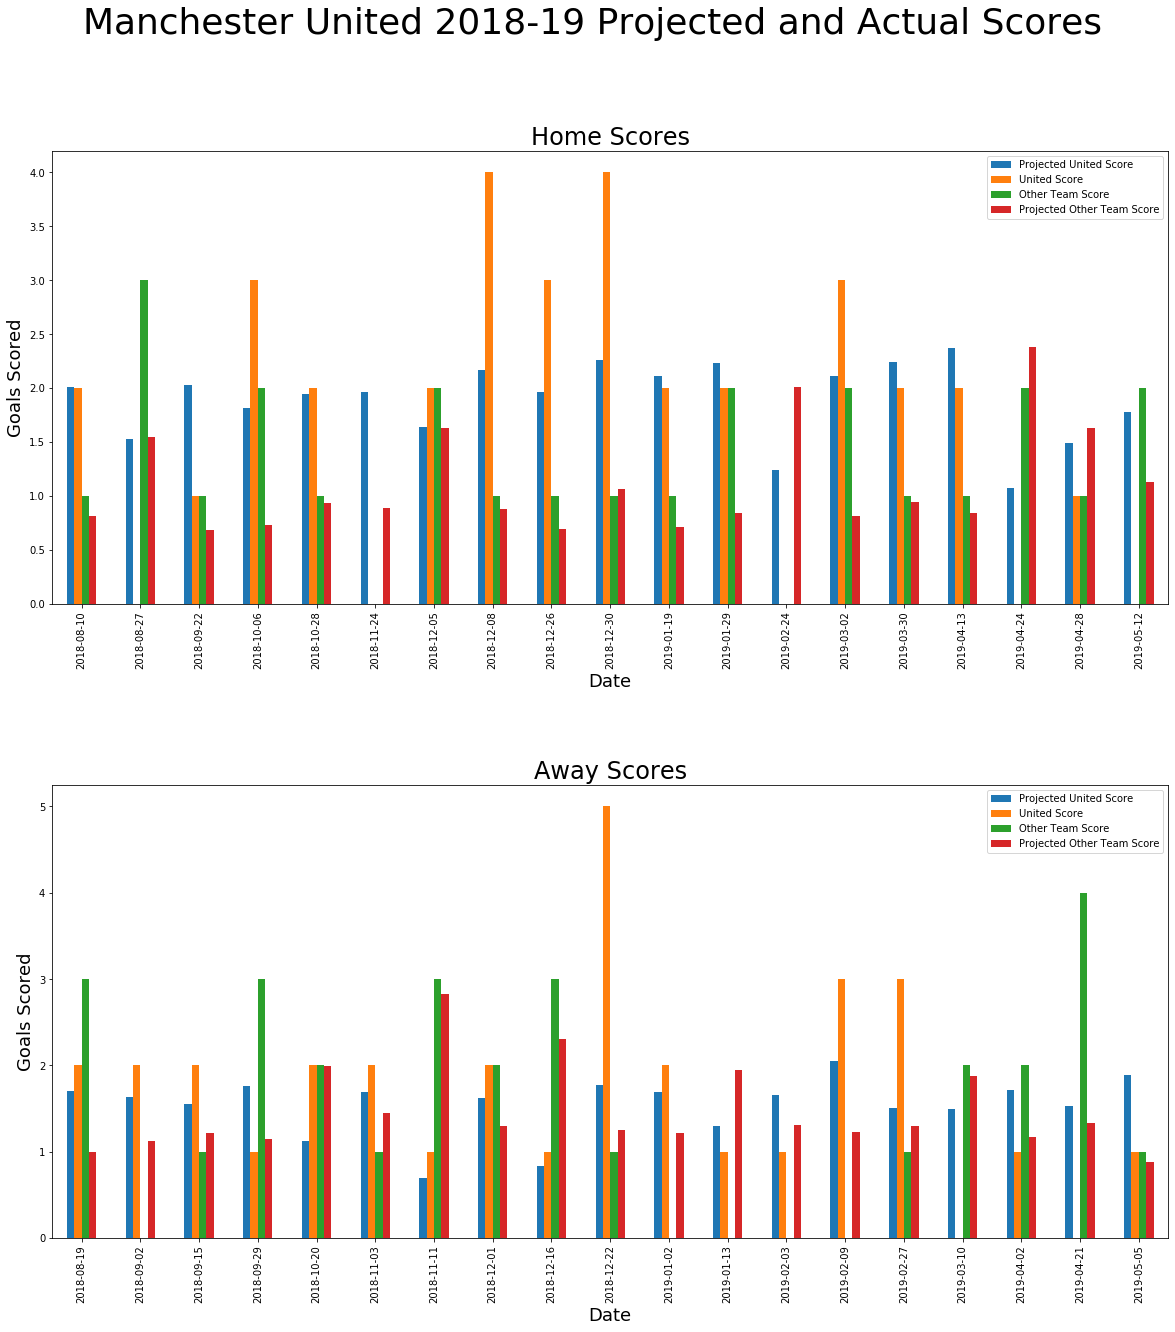

In [46]:
fig, ax = plt.subplots(2, figsize=[20,20])

fig.suptitle('Manchester United 2018-19 Projected and Actual Scores', fontsize =36)

manutd18home.plot(ax = ax[0], x = 'date', y=['proj_score1','score1', 'score2', 'proj_score2'], kind='bar')
ax[0].set_title('Home Scores', fontsize = 24)
ax[0].set_xlabel('Date', fontsize = 18)
ax[0].set_ylabel('Goals Scored', fontsize =18)
fig.subplots_adjust(hspace=.4)

manutd18away.plot(ax = ax[1], x = 'date', y=['proj_score2', 'score2', 'score1', 'proj_score1'], kind='bar')
ax[1].set_title('Away Scores', fontsize = 24)
fig.subplots_adjust(hspace=.4)


ax[1].set_xlabel('Date', fontsize = 18)
ax[1].set_ylabel('Goals Scored', fontsize = 18)

current_handles, current_labels = plt.gca().get_legend_handles_labels()
ax[0].legend(current_handles, ["Projected United Score", "United Score", "Other Team Score", "Projected Other Team Score"])
ax[1].legend(current_handles, ["Projected United Score", "United Score", "Other Team Score", "Projected Other Team Score"])


In [68]:
mancity = matches[(matches['team1']=='Manchester City') | (matches['team2'] == 'Manchester City')]


In [71]:
big_six = ['Chelsea', 'Arsenal', 'Tottenham Hotspur', 'Liverpool', 'Manchester United', 'Manchester City']

In [80]:
mancity_bigsix = mancity[
    ((mancity['team1'] == 'Manchester City') & (mancity['team2'].isin(big_six))) | 
     ((mancity['team1'].isin(big_six)) & (mancity['team2'] == 'Manchester City'))
     ]

In [89]:
mancity_bigsix2019 = mancity_bigsix[22:34]

In [116]:
mancity_bigsix2019 = mancity_bigsix2019[mancity_bigsix2019['league'] == 'Barclays Premier League']

In [117]:
mancity_bigsix2019home = mancity_bigsix2019[mancity_bigsix2019['team1'] == 'Manchester City']
mancity_bigsix2019away = mancity_bigsix2019[mancity_bigsix2019['team2'] == 'Manchester City']

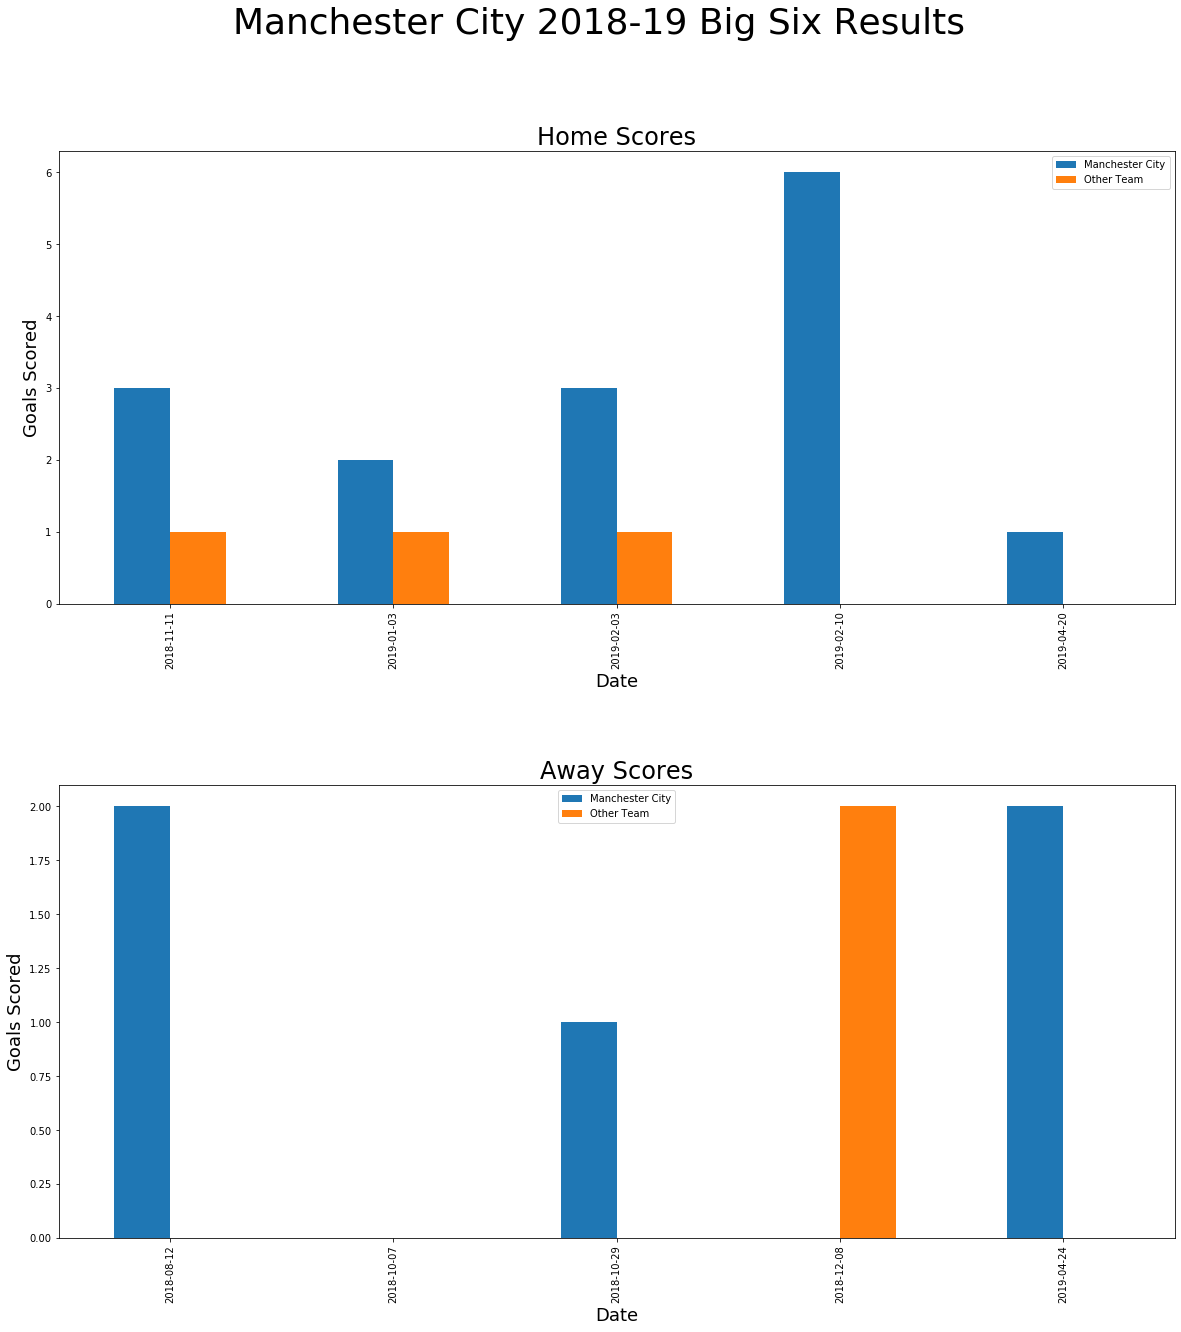

In [118]:
fig, ax = plt.subplots(2, figsize=[20,20])

fig.suptitle('Manchester City 2018-19 Big Six Results', fontsize =36)

mancity_bigsix2019home.plot(ax = ax[0], x = 'date', y=['score1', 'score2'], kind='bar')
ax[0].set_title('Home Scores', fontsize = 24)
ax[0].set_xlabel('Date', fontsize = 18)
ax[0].set_ylabel('Goals Scored', fontsize =18)
fig.subplots_adjust(hspace=.4)

mancity_bigsix2019away.plot(ax = ax[1], x = 'date', y=['score2', 'score1'], kind='bar')
ax[1].set_title('Away Scores', fontsize = 24)
fig.subplots_adjust(hspace=.4)


ax[1].set_xlabel('Date', fontsize = 18)
ax[1].set_ylabel('Goals Scored', fontsize = 18)

current_handles, current_labels = plt.gca().get_legend_handles_labels()
ax[0].legend(current_handles, ["Manchester City", "Other Team"])
ax[1].legend(current_handles, ["Manchester City", "Other Team"])


In [100]:
chelsea = matches[(matches['team1']=='Chelsea') | (matches['team2'] == 'Chelsea')]

chelsea_bigsix = chelsea[
    ((chelsea['team1'] == 'Chelsea') & (chelsea['team2'].isin(big_six))) | 
     ((chelsea['team1'].isin(big_six)) & (chelsea['team2'] == 'Chelsea'))
     ]

In [113]:
chelsea_bigsix2016 = chelsea_bigsix[0:10]

In [114]:
chelsea_bigsix2016

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
177,2016-09-16,2411,Barclays Premier League,Chelsea,Liverpool,81.72,79.28,0.5080,0.2532,0.2388,...,57.8,61.6,1.0,2.0,1.32,1.47,2.08,1.17,1.05,2.10
280,2016-09-24,2411,Barclays Premier League,Arsenal,Chelsea,83.19,81.10,0.4983,0.2563,0.2453,...,67.0,59.5,3.0,0.0,1.68,0.68,2.76,1.31,3.15,0.00
481,2016-10-23,2411,Barclays Premier League,Chelsea,Manchester United,82.00,80.66,0.4996,0.2397,0.2607,...,77.9,73.1,4.0,0.0,2.20,1.20,1.62,2.06,4.20,0.00
696,2016-11-26,2411,Barclays Premier League,Chelsea,Tottenham Hotspur,86.29,75.06,0.6450,0.1322,0.2228,...,73.1,67.9,2.0,1.0,1.12,0.48,1.15,0.93,2.10,1.05
741,2016-12-03,2411,Barclays Premier League,Manchester City,Chelsea,87.48,86.11,0.4914,0.2601,0.2485,...,100.0,100.0,1.0,3.0,2.72,1.39,2.12,1.38,1.05,2.63
964,2017-01-04,2411,Barclays Premier League,Tottenham Hotspur,Chelsea,80.23,86.13,0.3420,0.3830,0.2750,...,NaN,NaN,2.0,0.0,1.00,1.22,0.60,1.22,2.10,0.00
1153,2017-01-31,2411,Barclays Premier League,Liverpool,Chelsea,81.57,85.85,0.3637,0.3722,0.2640,...,72.0,92.1,1.0,1.0,1.67,1.01,1.43,0.59,1.05,1.05
1163,2017-02-04,2411,Barclays Premier League,Chelsea,Arsenal,85.58,83.05,0.5259,0.2273,0.2468,...,91.9,69.3,3.0,1.0,1.92,1.04,1.70,1.85,2.76,1.05
1725,2017-04-05,2411,Barclays Premier League,Chelsea,Manchester City,84.62,84.80,0.4585,0.2750,0.2665,...,NaN,NaN,2.0,1.0,1.93,2.17,1.30,1.85,2.10,1.05
1897,2017-04-16,2411,Barclays Premier League,Manchester United,Chelsea,82.04,85.17,0.4029,0.3110,0.2861,...,66.1,28.4,2.0,0.0,0.66,0.20,0.81,0.70,2.10,0.00


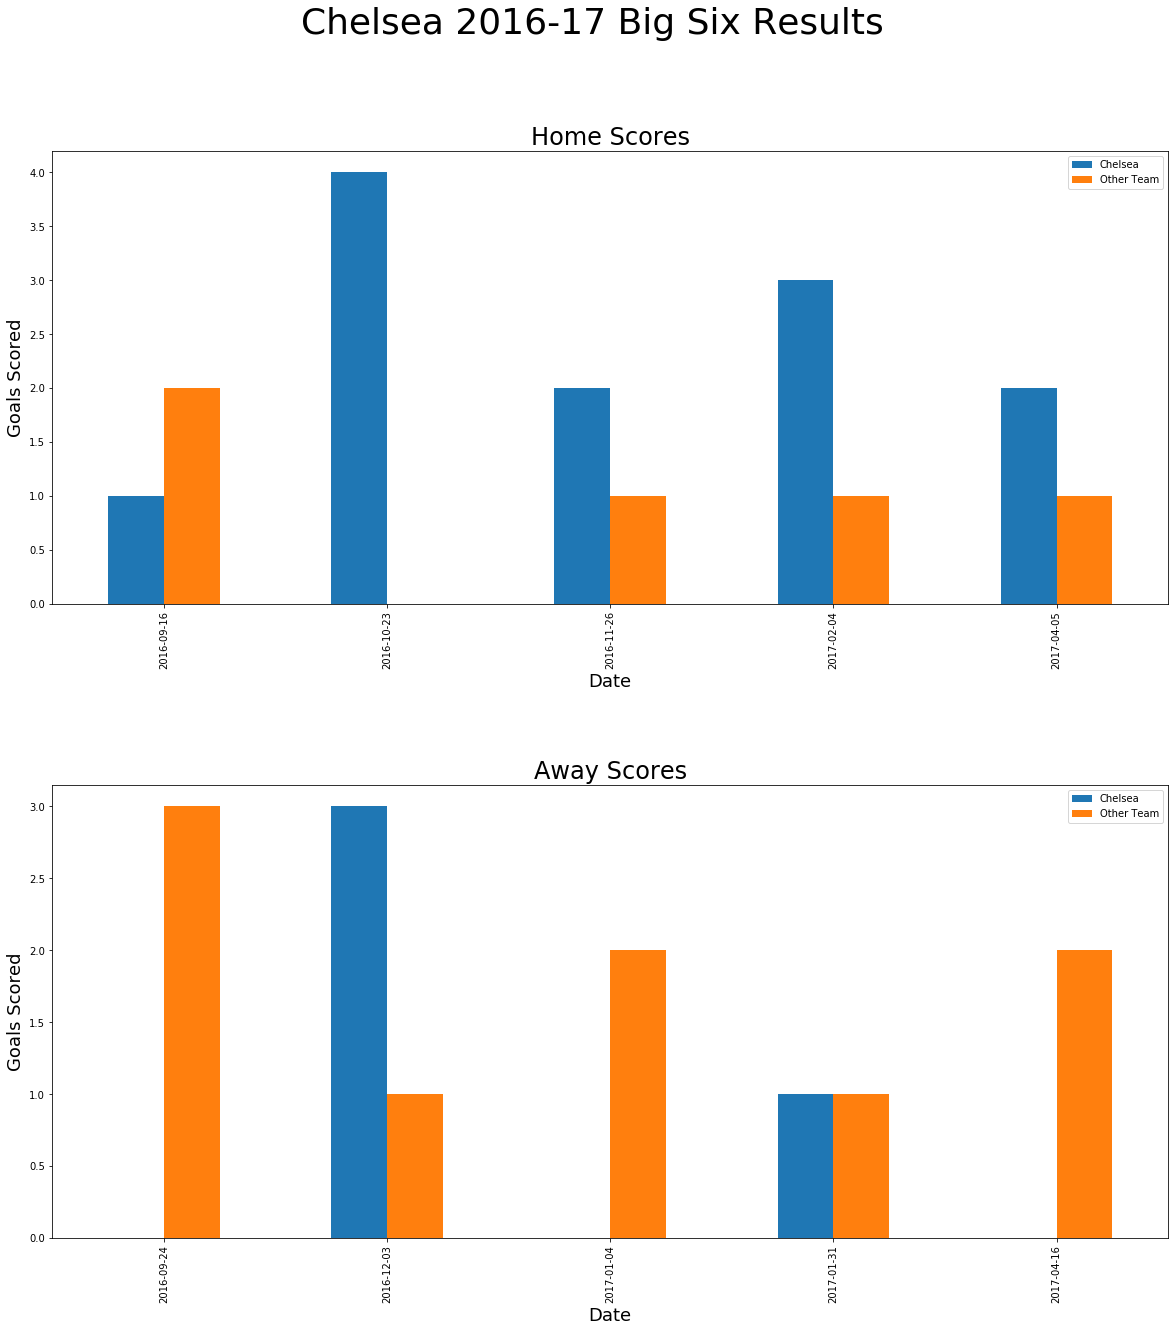

In [120]:
chelsea_bigsix2016home = chelsea_bigsix2016[chelsea_bigsix2016['team1'] == 'Chelsea']
chelsea_bigsix2016away = chelsea_bigsix2016[chelsea_bigsix2016['team2'] == 'Chelsea']

fig, ax = plt.subplots(2, figsize=[20,20])

fig.suptitle('Chelsea 2016-17 Big Six Results', fontsize =36)

chelsea_bigsix2016home.plot(ax = ax[0], x = 'date', y=['score1', 'score2'], kind='bar')
ax[0].set_title('Home Scores', fontsize = 24)
ax[0].set_xlabel('Date', fontsize = 18)
ax[0].set_ylabel('Goals Scored', fontsize =18)
fig.subplots_adjust(hspace=.4)

chelsea_bigsix2016away.plot(ax = ax[1], x = 'date', y=['score2', 'score1'], kind='bar')
ax[1].set_title('Away Scores', fontsize = 24)
fig.subplots_adjust(hspace=.4)


ax[1].set_xlabel('Date', fontsize = 18)
ax[1].set_ylabel('Goals Scored', fontsize = 18)

current_handles, current_labels = plt.gca().get_legend_handles_labels()
ax[0].legend(current_handles, ["Chelsea", "Other Team"])
ax[1].legend(current_handles, ["Chelsea", "Other Team"])


In [122]:
manutd = matches[(matches['team1']=='Manchester United') | (matches['team2'] == 'Manchester United')]

manutd_bigsix = manutd[
    ((manutd['team1'] == 'Manchester United') & (manutd['team2'].isin(big_six))) | 
     ((manutd['team1'].isin(big_six)) & (manutd['team2'] == 'Manchester United'))
     ]

manutd_bigsix2016 = manutd_bigsix[0:10]


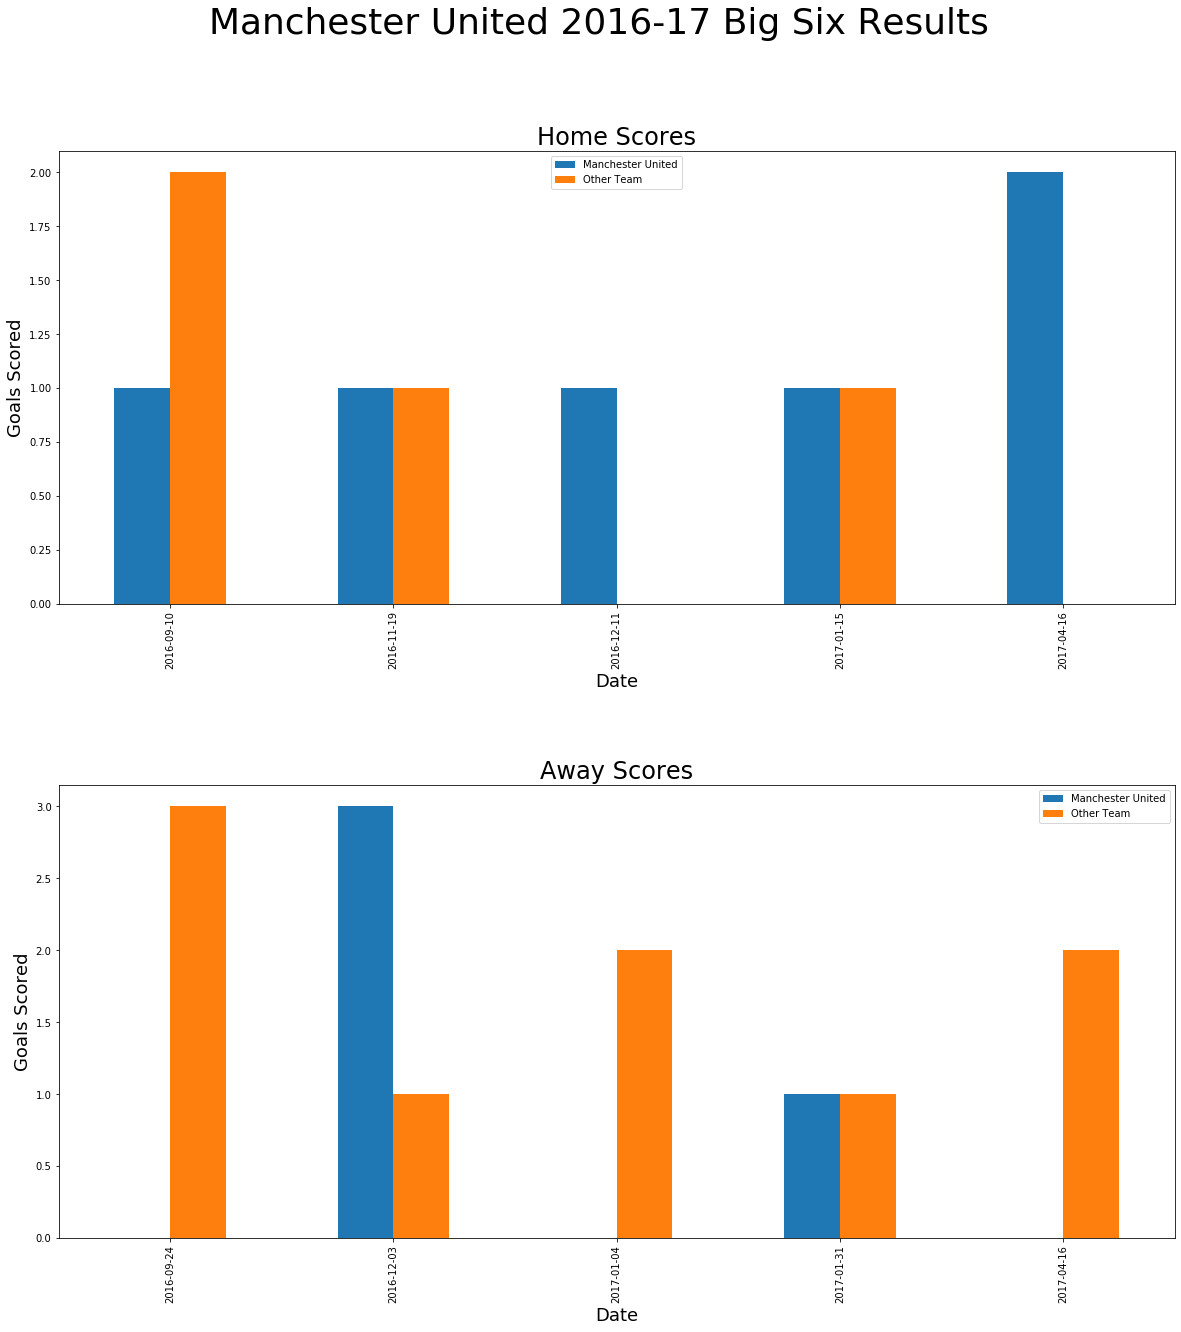

In [124]:
manutd_bigsix2016home = manutd_bigsix2016[manutd_bigsix2016['team1'] == 'Manchester United']
manutd_bigsix2016away = manutd_bigsix2016[manutd_bigsix2016['team2'] == 'Manchester United']

fig, ax = plt.subplots(2, figsize=[20,20])

fig.suptitle('Manchester United 2016-17 Big Six Results', fontsize =36)

manutd_bigsix2016home.plot(ax = ax[0], x = 'date', y=['score1', 'score2'], kind='bar')
ax[0].set_title('Home Scores', fontsize = 24)
ax[0].set_xlabel('Date', fontsize = 18)
ax[0].set_ylabel('Goals Scored', fontsize =18)
fig.subplots_adjust(hspace=.4)

chelsea_bigsix2016away.plot(ax = ax[1], x = 'date', y=['score2', 'score1'], kind='bar')
ax[1].set_title('Away Scores', fontsize = 24)
fig.subplots_adjust(hspace=.4)


ax[1].set_xlabel('Date', fontsize = 18)
ax[1].set_ylabel('Goals Scored', fontsize = 18)

current_handles, current_labels = plt.gca().get_legend_handles_labels()
ax[0].legend(current_handles, ["Manchester United", "Other Team"])
ax[1].legend(current_handles, ["Manchester United", "Other Team"])
